In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import warnings
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
pip install "numpy<2" --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires opencv-contrib-python, which is not installed.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
torchvision 0.22.1 requires torch==2.7.1, but you have torch 2.6.0 which is incompatible.
tsai 0.4.0 requires torch<2.6,>=1.10, but you have torch 2.6.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [ ]:
data = pd.read_csv("/content/Battery_RUL.csv")

In [ ]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
def get_metadata(dataframe):
    '''
    A function that fetches all the Metadata Information about the Dataframe
    This function can be reused for all Pandas Dataframe
    '''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 100)
    print("STATISTICAL INFORMATION")
    display(dataframe.describe(include='all'))
    print("=" * 100)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 100)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 100)
    print("NULL Values Check")
    print(dataframe.isnull().sum())
    print("=" * 100)

In [ ]:
get_metadata(data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
None
STATISTICAL INFORMATION


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


Dataframe Shape
 (15064, 9)
Number of Duplicate Rows
 0
NULL Values Check
Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64


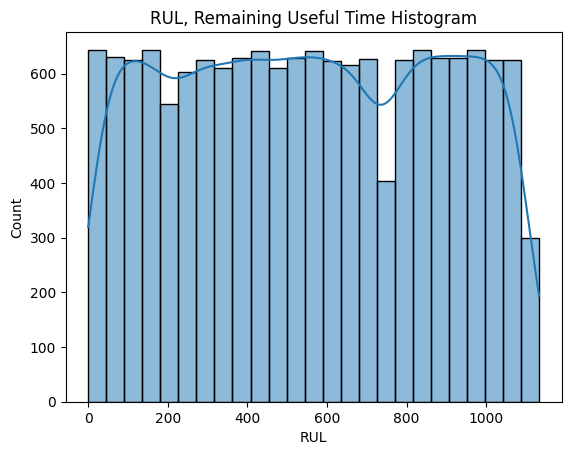

In [ ]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(data.RUL, kde=True)
plt.show()

<Axes: >

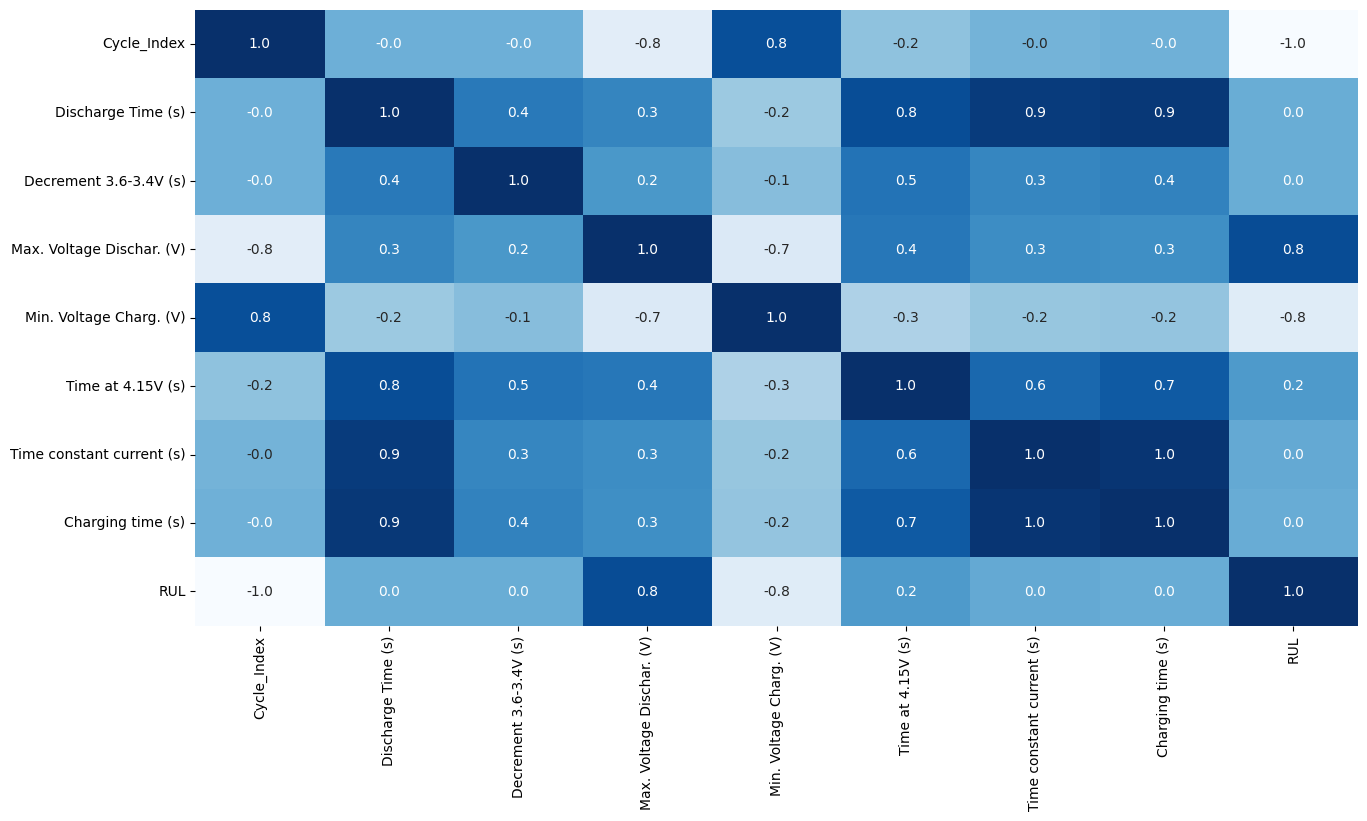

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [ ]:
data=data.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)','Charging time (s)'],axis=1)

In [ ]:
data.head()

,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),RUL
0,3.670,3.211,5460.001,1112
1,4.246,3.220,5508.992,1111
2,4.249,3.224,5508.993,1110
3,4.250,3.225,5502.016,1109
4,4.290,3.398,5480.992,1107


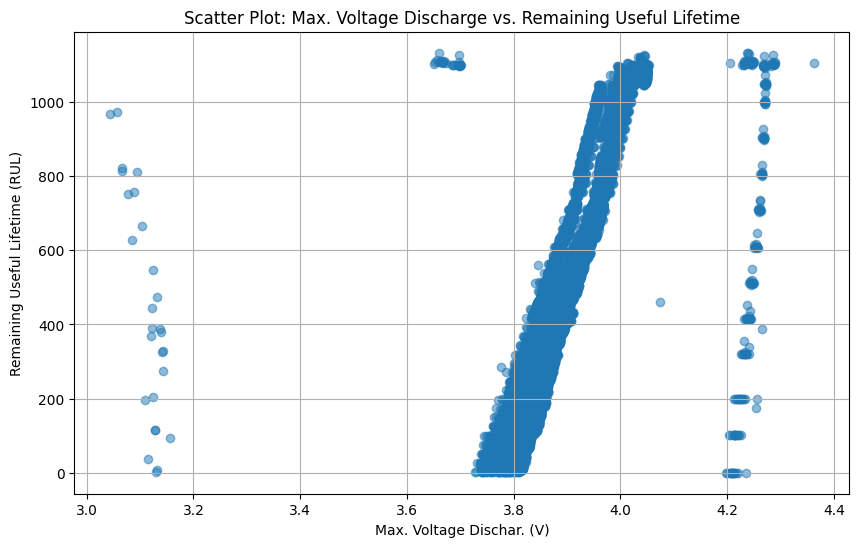

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Max. Voltage Dischar. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Max. Voltage Discharge vs. Remaining Useful Lifetime')
plt.xlabel('Max. Voltage Dischar. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

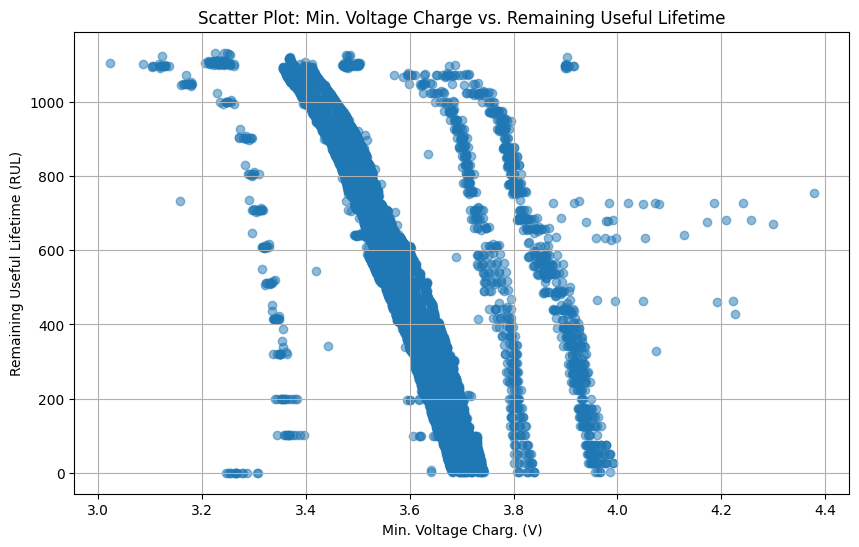

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Min. Voltage Charg. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Min. Voltage Charge vs. Remaining Useful Lifetime')
plt.xlabel('Min. Voltage Charg. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

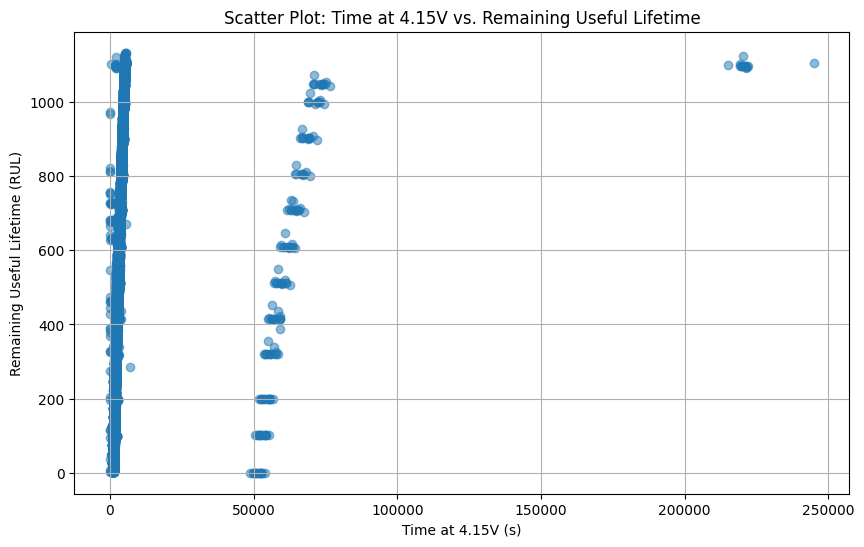

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Time at 4.15V (s)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Time at 4.15V vs. Remaining Useful Lifetime')
plt.xlabel('Time at 4.15V (s)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

In [ ]:
X = data.drop(['RUL'], axis=1)
y = data['RUL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2023, shuffle =True)

In [ ]:
class Pipeline:
    def __init__(self, scalar):
        self.scalar = scalar

    def fit(self, X, y):
        X = self.scalar.fit_transform(X)
        return X, y

    def transform(self, X, y):
        X = self.scalar.transform(X)
        return X, y

In [ ]:
robust = RobustScaler()
pipeline = Pipeline(robust)

In [ ]:
X_train, y_train = pipeline.fit(X_train, y_train)
X_test, y_test = pipeline.transform(X_test, y_test)

# # Linear Regression

In [ ]:
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = linear_regression.predict(X_train)

# Make predictions on the test set
y_test_pred = linear_regression.predict(X_test)

# Evaluate the performance on the training set
train_score = linear_regression.score(X_train, y_train)
print("Score on Training Set: {:.2%}".format(train_score))

# Calculate and print the R^2 score on the test set
test_score = linear_regression.score(X_test, y_test)
print("Score on Test Set: {:.2%}".format(test_score))

Score on Training Set: 72.38%
Score on Test Set: 75.64%


# # KNN

In [ ]:
model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

y_predictions = model.predict(X_test)# These are the predictions from the test data.

print('training score: '+ "{:.2%}".format(model.score(X_train, y_train)))
print('test score: '+ "{:.2%}".format(model.score(X_test,y_test)))

training score: 99.59%
test score: 99.13%


# # SVM

In [ ]:
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the model to the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Evaluate the performance on the training set
train_score = svm_regressor.score(X_train, y_train)
print("Score on Training Set: {:.2%}".format(train_score))

# Calculate and print the R^2 score on the test set
test_score = svm_regressor.score(X_test, y_test)
print("Score on Test Set: {:.2%}".format(test_score))

# # Visualize the predicted vs actual values
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted Values for SVM Regression')
# plt.show()

Mean Squared Error: 28214.572819922752
Score on Training Set: 66.07%
Score on Test Set: 72.72%


# # Decision tree

In [ ]:
# Create a decision tree regressor model
decision_tree = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model1 = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model1.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set: ", mse)

train_score = best_model1.score(X_train, y_train)
print("Score on Training Set: {:.2%}".format(train_score))

# Calculate and print the R^2 score on the test set
test_score = best_model1.score(X_test, y_test)
print("Score on Test Set: {:.2%}".format(test_score))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error on Test Set:  1389.3735980438871
Score on Training Set: 99.56%
Score on Test Set: 98.66%


# # Random Forest

In [ ]:
random_forest = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='r2', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate and print the R^2 score on the training set
train_score = best_model.score(X_train, y_train)
print("R^2 Score on Training Set: {:.2%}".format(train_score))

# Calculate and print the R^2 score on the test set
test_score = best_model.score(X_test, y_test)
print("R^2 Score on Test Set: {:.2%}".format(test_score))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R^2 Score on Training Set: 99.86%
R^2 Score on Test Set: 99.15%


# # Best Model

In [ ]:
def find_best_model(X, y):
    algorithms = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Machine': make_pipeline(RobustScaler(), SVR())
        # Add more algorithms as needed
    }

    best_model_name = None
    best_score = float('-inf')

    for name, model in algorithms.items():
        # Using cross_val_score for simplicity
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # You can change the scoring metric

        # Take the mean of cross-validation scores as the performance metric
        mean_score = scores.mean()

        print(f"{name} - R^2 Score: {mean_score:.4f}")

        # Update the best model if the current one has a higher score
        if mean_score > best_score:
            best_score = mean_score
            best_model_name = name

    print(f"\nBest Model: {best_model_name} with R^2 Score: {best_score:.4f}")

# Assuming X is your feature matrix and y is your target variable
# Replace X and y with your actual feature matrix and target variable
find_best_model(X, y)

Linear Regression - R^2 Score: 0.7156
Decision Tree - R^2 Score: 0.9486
Random Forest - R^2 Score: 0.9608
Support Vector Machine - R^2 Score: 0.9190

Best Model: Random Forest with R^2 Score: 0.9608
